# Tabular models -- box office playgroud dataset

In [1]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

## download data

In [3]:
!kaggle competitions download -c tmdb-box-office-prediction

  0%|                                               | 0.00/60.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 60.1k/60.1k [00:00<00:00, 43.4MB/s]
 71%|███████████████████████████           | 5.00M/7.02M [00:00<00:00, 6.49MB/s]
100%|██████████████████████████████████████| 7.02M/7.02M [00:00<00:00, 9.05MB/s]
 87%|█████████████████████████████████     | 9.00M/10.3M [00:00<00:00, 17.4MB/s]
100%|██████████████████████████████████████| 10.3M/10.3M [00:00<00:00, 19.8MB/s]


In [2]:
path = Path('/home/jupyter/.fastai/data/tmdb-box-office/')

In [62]:
train_df = pd.read_csv(path/'train.csv')
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [44]:
test_df = pd.read_csv(path/'test.csv')
test_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [42]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/tmdb-box-office/sample_submission.csv'),
 PosixPath('/home/jupyter/.fastai/data/tmdb-box-office/test.csv'),
 PosixPath('/home/jupyter/.fastai/data/tmdb-box-office/train.csv')]

In [48]:
train_df.count()

id                       3000
belongs_to_collection     604
budget                   3000
genres                   2993
homepage                  946
imdb_id                  3000
original_language        3000
original_title           3000
overview                 2992
popularity               3000
poster_path              2999
production_companies     2844
production_countries     2945
release_date             3000
runtime                  2998
spoken_languages         2980
status                   3000
tagline                  2403
title                    3000
Keywords                 2724
cast                     2987
crew                     2984
revenue                  3000
dtype: int64

In [85]:
train_df['runtime'][:1]

0    93.0
Name: runtime, dtype: float64

In [54]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

## Need to process genre. One movie could have multiple genres.
## Need to process product_companies. One movie could have multiple companies.
## Need to proess product_countries. One movie could have multiple countries.
## Need to convert datetime to int
## Need to process spoken languages
## Need to process keywords

In [63]:
dep_var = 'revenue'
cat_names = ['original_language', 'status']
cont_names = ['budget', 'popularity', 'runtime']

In [74]:
procs = [FillMissing, Categorify, Normalize]

In [ ]:
#dep_var = 'salary'
#cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
#cont_names = ['age', 'fnlwgt', 'education-num']
#procs = [FillMissing, Categorify, Normalize]

In [81]:
test = TabularList.from_df(train_df.iloc[2400:3000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [82]:
#test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [83]:
data = (TabularList.from_df(train_df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
       .split_by_idx(list(range(2400, 3000)))
       .label_from_df(cols=dep_var, label_cls=FloatList)
       .add_test(test)
       .databunch())

In [ ]:
#data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [84]:
data.show_batch(rows=10)

original_language,status,runtime_na,budget,popularity,runtime,target
hi,Released,False,-0.4851,-0.4960,1.7163,10000000.0
en,Released,False,-0.4636,-0.4223,-0.4484,742898.0
fr,Released,False,-0.5981,-0.6248,-0.4484,457163.0
en,Released,False,1.0157,0.3307,0.7241,101134056.0
es,Released,False,-0.5443,-0.1994,2.0770,20908468.0
en,Released,False,-0.5981,-0.3254,0.5437,14631377.0
en,Released,False,-0.5949,-0.5266,-0.9445,14904.0
en,Released,False,-0.5658,-0.2417,0.3182,2736000.0
en,Released,False,-0.5981,0.1211,-0.6288,1986615.0
en,Released,False,-0.2216,-0.5462,-0.6739,161001696.0


In [92]:
learn = tabular_learner(data, layers=[20,10], metrics=rmse)

In [93]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


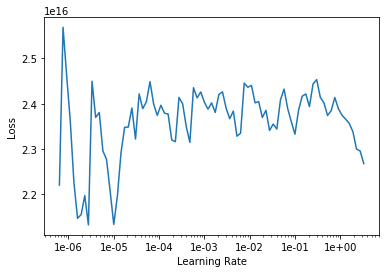

In [94]:
learn.recorder.plot()

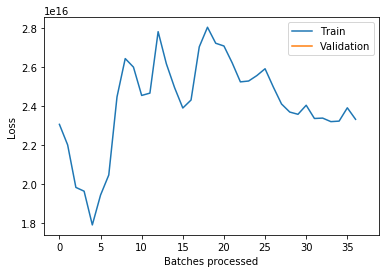

In [91]:
learn.recorder.plot_losses()

In [95]:
learn.fit(1, 1e-5)

epoch,train_loss,valid_loss,root_mean_squared_error
1,23355454482546688.000000,22447300827676672.000000,141255680.000000


## Inference

In [ ]:
row = df.iloc[0]

In [ ]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.3702, 0.6298]))